In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.formula.api as sm
import statsmodels.api as sap
import random
from sklearn.cross_validation import train_test_split

In [2]:
%matplotlib inline
sb.set(context="talk")

In [3]:
flights = pd.read_csv('flight_data.csv')
p13 = pd.read_csv('FY 2013 export_entry.csv')
p14 = pd.read_csv('FY 2014 export_entry.csv')
p15 = pd.read_csv('FY 2015 export_entry.csv')

# Looking into data samples

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175369 entries, 0 to 175368
Data columns (total 10 columns):
MAG Airport Name              175369 non-null object
Scheduled Date                175369 non-null object
Operator IATA Code            175369 non-null object
Operator Name                 175369 non-null object
Arriving or Departing Flag    175369 non-null object
Airport IATA Code             175369 non-null object
Airport Name                  175369 non-null object
Actual Date Time              172629 non-null object
Scheduled Date Time           175369 non-null object
# Pax                         87725 non-null float64
dtypes: float64(1), object(9)
memory usage: 13.4+ MB


In [5]:
flights.head()

,MAG Airport Name,Scheduled Date,Operator IATA Code,Operator Name,Arriving or Departing Flag,Airport IATA Code,Airport Name,Actual Date Time,Scheduled Date Time,# Pax
0,East Midlands,01/04/2012,FR,RYANAIR,Arriving,RHO,Rhodes (Paradisi),01/04/2012 00:11,01/04/2012 00:05,5.0
1,East Midlands,01/04/2012,LS,JET2.COM,Arriving,TFS,Tenerife,01/04/2012 00:36,01/04/2012 00:20,125.0
2,East Midlands,01/04/2012,TCX,THOMAS COOK AIRLINES,Arriving,AYT,Antalya,01/04/2012 01:01,01/04/2012 01:10,212.0
3,East Midlands,01/04/2012,TOM,THOMSON AIRWAYS,Arriving,LPA,Gran Canaria,01/04/2012 00:51,01/04/2012 01:15,176.0
4,East Midlands,01/04/2012,TOM,THOMSON AIRWAYS,Arriving,PFO,Paphos,01/04/2012 01:31,01/04/2012 01:55,0.0


In [6]:
flights.tail()

,MAG Airport Name,Scheduled Date,Operator IATA Code,Operator Name,Arriving or Departing Flag,Airport IATA Code,Airport Name,Actual Date Time,Scheduled Date Time,# Pax
175364,East Midlands,31/03/2015,BCS,EUROPEAN AIR TRANSPORT,Departing,CDG,Paris - Charles De Gaulle,31/03/2015 23:31,31/03/2015 23:20,NaN
175365,East Midlands,31/03/2015,FR,RYANAIR,Arriving,TFS,Tenerife,31/03/2015 23:40,31/03/2015 23:20,187.0
175366,East Midlands,31/03/2015,FR,RYANAIR,Arriving,IBZ,Ibiza,31/03/2015 23:39,31/03/2015 23:35,8.0
175367,East Midlands,31/03/2015,FR,RYANAIR,Arriving,RZE,Rzeszow,01/04/2015 00:04,31/03/2015 23:40,169.0
175368,East Midlands,31/03/2015,LOG,LOGAN AIR,Arriving,EDI,Edinburgh,31/03/2015 23:51,31/03/2015 23:55,NaN


In [7]:
p13.head(2)

,OPERATOR_TYPE,CARPARK_SUMMARY_NAME,SOURCE_BOOKING_REF,ENTRY_DATE_TIME,EXIT_DATE_TIME,ENTRY_DATE_TIME_1,BOOKING_DATE_TIME,"NVL(FACT_CARPARK_BOOKING.TOTAL_GROSS_PRICE,FACT_CARPARK_BOOKING.GROSS_PRICE)","NVL(FACT_CARPARK_BOOKING.TOTAL_NET_PRICE,FACT_CARPARK_BOOKING.NET_PRICE)",BOOKING_TYPE,TRUEFALS_CANCELLED
0,Turnup,Short Stay,201204010007555101169318-1,01-Apr-12,01-Apr-12,01-Apr-12,01-Apr-12,2.0,1.67,Turnup SS,0
1,Turnup,Short Stay,201204010108047701197792-1,01-Apr-12,01-Apr-12,01-Apr-12,01-Apr-12,3.0,2.50,Turnup SS,0


In [8]:
p14.head(2)

,OPERATOR_TYPE,CARPARK_SUMMARY_NAME,SOURCE_BOOKING_REF,ENTRY_DATE_TIME,EXIT_DATE_TIME,ENTRY_DATE_TIME_1,BOOKING_DATE_TIME,"NVL(FACT_CARPARK_BOOKING.TOTAL_GROSS_PRICE,FACT_CARPARK_BOOKING.GROSS_PRICE)","NVL(FACT_CARPARK_BOOKING.TOTAL_NET_PRICE,FACT_CARPARK_BOOKING.NET_PRICE)",BOOKING_TYPE,TRUEFALS_CANCELLED
0,Prebooked,Express Park,EWEP1294215,01-APR-13,02-APR-13,01-APR-13,25-MAR-13,23.99,19.99,Prebooked,0
1,Prebooked,Meet and Greet,XULN2,01-APR-13,09-APR-13,01-APR-13,27-MAR-13,62.67,38.12,Prebooked,0


In [9]:
p15.head(2)

,OPERATOR_TYPE,CARPARK_SUMMARY_NAME,SOURCE_BOOKING_REF,ENTRY_DATE_TIME,EXIT_DATE_TIME,ENTRY_DATE_TIME_1,BOOKING_DATE_TIME,"NVL(FACT_CARPARK_BOOKING.TOTAL_GROSS_PRICE,FACT_CARPARK_BOOKING.GROSS_PRICE)","NVL(FACT_CARPARK_BOOKING.TOTAL_NET_PRICE,FACT_CARPARK_BOOKING.NET_PRICE)",BOOKING_TYPE,TRUEFALS_CANCELLED
0,Prebooked,JetParks Plus,EX521720707,01-APR-14,08-APR-14,01-APR-14,31-JAN-14,16.44,10.00,Prebooked,0
1,Turnup,Short Stay,EMA_FY2015_MANUAL_20140401_SSCP,01-APR-14,01-APR-14,01-APR-14,01-APR-14,4061.75,3384.79,Turnup SS,0


# Checking for empty values on flights

In [10]:
flights.isnull().sum()

MAG Airport Name                  0
Scheduled Date                    0
Operator IATA Code                0
Operator Name                     0
Arriving or Departing Flag        0
Airport IATA Code                 0
Airport Name                      0
Actual Date Time               2740
Scheduled Date Time               0
# Pax                         87644
dtype: int64

In [11]:
type(flights['Actual Date Time'][0])

str

# Cleaning rows with invalid "actual date"
I assumed that flights with scheduled date but no actual date were cancelled of merged into other flights, but this assumption would need to be tested

In [12]:
idx_emptyActDate = flights['Actual Date Time'].map(lambda x: isinstance(x, str))

In [13]:
flights = flights.ix[idx_emptyActDate, :]

In [14]:
flights.head()

,MAG Airport Name,Scheduled Date,Operator IATA Code,Operator Name,Arriving or Departing Flag,Airport IATA Code,Airport Name,Actual Date Time,Scheduled Date Time,# Pax
0,East Midlands,01/04/2012,FR,RYANAIR,Arriving,RHO,Rhodes (Paradisi),01/04/2012 00:11,01/04/2012 00:05,5.0
1,East Midlands,01/04/2012,LS,JET2.COM,Arriving,TFS,Tenerife,01/04/2012 00:36,01/04/2012 00:20,125.0
2,East Midlands,01/04/2012,TCX,THOMAS COOK AIRLINES,Arriving,AYT,Antalya,01/04/2012 01:01,01/04/2012 01:10,212.0
3,East Midlands,01/04/2012,TOM,THOMSON AIRWAYS,Arriving,LPA,Gran Canaria,01/04/2012 00:51,01/04/2012 01:15,176.0
4,East Midlands,01/04/2012,TOM,THOMSON AIRWAYS,Arriving,PFO,Paphos,01/04/2012 01:31,01/04/2012 01:55,0.0


In [15]:
flights.isnull().sum()

MAG Airport Name                  0
Scheduled Date                    0
Operator IATA Code                0
Operator Name                     0
Arriving or Departing Flag        0
Airport IATA Code                 0
Airport Name                      0
Actual Date Time                  0
Scheduled Date Time               0
# Pax                         84906
dtype: int64

# Checking for empty values on parking datasets

In [16]:
p13.isnull().sum()

OPERATOR_TYPE                                                                   0
CARPARK_SUMMARY_NAME                                                            0
SOURCE_BOOKING_REF                                                              0
ENTRY_DATE_TIME                                                                 0
EXIT_DATE_TIME                                                                  0
ENTRY_DATE_TIME_1                                                               0
BOOKING_DATE_TIME                                                               0
NVL(FACT_CARPARK_BOOKING.TOTAL_GROSS_PRICE,FACT_CARPARK_BOOKING.GROSS_PRICE)    0
NVL(FACT_CARPARK_BOOKING.TOTAL_NET_PRICE,FACT_CARPARK_BOOKING.NET_PRICE)        0
BOOKING_TYPE                                                                    0
TRUEFALS_CANCELLED                                                              0
dtype: int64

In [17]:
p14.isnull().sum()

OPERATOR_TYPE                                                                   0
CARPARK_SUMMARY_NAME                                                            0
SOURCE_BOOKING_REF                                                              0
ENTRY_DATE_TIME                                                                 0
EXIT_DATE_TIME                                                                  0
ENTRY_DATE_TIME_1                                                               0
BOOKING_DATE_TIME                                                               0
NVL(FACT_CARPARK_BOOKING.TOTAL_GROSS_PRICE,FACT_CARPARK_BOOKING.GROSS_PRICE)    4
NVL(FACT_CARPARK_BOOKING.TOTAL_NET_PRICE,FACT_CARPARK_BOOKING.NET_PRICE)        4
BOOKING_TYPE                                                                    0
TRUEFALS_CANCELLED                                                              0
dtype: int64

Since only the price columns are missing values, I will not remove those rows.

In [18]:
p15.isnull().sum()

OPERATOR_TYPE                                                                   0
CARPARK_SUMMARY_NAME                                                            0
SOURCE_BOOKING_REF                                                              0
ENTRY_DATE_TIME                                                                 0
EXIT_DATE_TIME                                                                  0
ENTRY_DATE_TIME_1                                                               0
BOOKING_DATE_TIME                                                               0
NVL(FACT_CARPARK_BOOKING.TOTAL_GROSS_PRICE,FACT_CARPARK_BOOKING.GROSS_PRICE)    0
NVL(FACT_CARPARK_BOOKING.TOTAL_NET_PRICE,FACT_CARPARK_BOOKING.NET_PRICE)        0
BOOKING_TYPE                                                                    0
TRUEFALS_CANCELLED                                                              0
dtype: int64

# Renaming columns

In [19]:
p13=p13.rename(index=str, columns={"OPERATOR_TYPE": "op_type", "CARPARK_SUMMARY_NAME": "summary", "SOURCE_BOOKING_REF": "ref", "ENTRY_DATE_TIME": "in", "EXIT_DATE_TIME": "out", "ENTRY_DATE_TIME_1":"in1", "BOOKING_DATE_TIME":"booking_date" , "NVL(FACT_CARPARK_BOOKING.TOTAL_GROSS_PRICE,FACT_CARPARK_BOOKING.GROSS_PRICE)":"gross_price", "NVL(FACT_CARPARK_BOOKING.TOTAL_NET_PRICE,FACT_CARPARK_BOOKING.NET_PRICE)": "net_price", "BOOKING_TYPE":"booking_type", "TRUEFALS_CANCELLED":"cancelled" })

In [20]:
p14=p14.rename(index=str, columns={"OPERATOR_TYPE": "op_type", "CARPARK_SUMMARY_NAME": "summary", "SOURCE_BOOKING_REF": "ref", "ENTRY_DATE_TIME": "in", "EXIT_DATE_TIME": "out", "ENTRY_DATE_TIME_1":"in1", "BOOKING_DATE_TIME":"booking_date" , "NVL(FACT_CARPARK_BOOKING.TOTAL_GROSS_PRICE,FACT_CARPARK_BOOKING.GROSS_PRICE)":"gross_price", "NVL(FACT_CARPARK_BOOKING.TOTAL_NET_PRICE,FACT_CARPARK_BOOKING.NET_PRICE)": "net_price", "BOOKING_TYPE":"booking_type", "TRUEFALS_CANCELLED":"cancelled" })

In [21]:
p15=p15.rename(index=str, columns={"OPERATOR_TYPE": "op_type", "CARPARK_SUMMARY_NAME": "summary", "SOURCE_BOOKING_REF": "ref", "ENTRY_DATE_TIME": "in", "EXIT_DATE_TIME": "out", "ENTRY_DATE_TIME_1":"in1", "BOOKING_DATE_TIME":"booking_date" , "NVL(FACT_CARPARK_BOOKING.TOTAL_GROSS_PRICE,FACT_CARPARK_BOOKING.GROSS_PRICE)":"gross_price", "NVL(FACT_CARPARK_BOOKING.TOTAL_NET_PRICE,FACT_CARPARK_BOOKING.NET_PRICE)": "net_price", "BOOKING_TYPE":"booking_type", "TRUEFALS_CANCELLED":"cancelled" })

In [22]:
p13.head(2)

,op_type,summary,ref,in,out,in1,booking_date,gross_price,net_price,booking_type,cancelled
0,Turnup,Short Stay,201204010007555101169318-1,01-Apr-12,01-Apr-12,01-Apr-12,01-Apr-12,2.0,1.67,Turnup SS,0
1,Turnup,Short Stay,201204010108047701197792-1,01-Apr-12,01-Apr-12,01-Apr-12,01-Apr-12,3.0,2.50,Turnup SS,0


# Converting dates to datetime

In [23]:
flights['Scheduled Date']=pd.to_datetime(flights['Scheduled Date'], format='%d/%m/%Y')

In [24]:
flights['Actual Date Time']=pd.to_datetime(flights['Actual Date Time'], format='%d/%m/%Y %H:%M')

In [25]:
flights['Scheduled Date Time']=pd.to_datetime(flights['Scheduled Date Time'], format='%d/%m/%Y %H:%M')

In [26]:
flights.head(2)

,MAG Airport Name,Scheduled Date,Operator IATA Code,Operator Name,Arriving or Departing Flag,Airport IATA Code,Airport Name,Actual Date Time,Scheduled Date Time,# Pax
0,East Midlands,2012-04-01,FR,RYANAIR,Arriving,RHO,Rhodes (Paradisi),2012-04-01 00:11:00,2012-04-01 00:05:00,5.0
1,East Midlands,2012-04-01,LS,JET2.COM,Arriving,TFS,Tenerife,2012-04-01 00:36:00,2012-04-01 00:20:00,125.0


In [29]:
p13['in']=pd.to_datetime(p13['in'], format='%d-%b-%y')
p13['out']=pd.to_datetime(p13['out'],format='%d-%b-%y')
p13['in1']=pd.to_datetime(p13['in1'],format='%d-%b-%y')

In [30]:
p13.head(2)

,op_type,summary,ref,in,out,in1,booking_date,gross_price,net_price,booking_type,cancelled
0,Turnup,Short Stay,201204010007555101169318-1,2012-04-01,2012-04-01,2012-04-01,01-Apr-12,2.0,1.67,Turnup SS,0
1,Turnup,Short Stay,201204010108047701197792-1,2012-04-01,2012-04-01,2012-04-01,01-Apr-12,3.0,2.50,Turnup SS,0


In [31]:
p14['in']=pd.to_datetime(p14['in'],format='%d-%b-%y')
p14['out']=pd.to_datetime(p14['out'],format='%d-%b-%y')
p14['in1']=pd.to_datetime(p14['in1'],format='%d-%b-%y')

In [32]:
p14.head(2)

,op_type,summary,ref,in,out,in1,booking_date,gross_price,net_price,booking_type,cancelled
0,Prebooked,Express Park,EWEP1294215,2013-04-01,2013-04-02,2013-04-01,25-MAR-13,23.99,19.99,Prebooked,0
1,Prebooked,Meet and Greet,XULN2,2013-04-01,2013-04-09,2013-04-01,27-MAR-13,62.67,38.12,Prebooked,0


In [33]:
p15['in']=pd.to_datetime(p15['in'],format='%d-%b-%y')
p15['out']=pd.to_datetime(p15['out'],format='%d-%b-%y')
p15['in1']=pd.to_datetime(p15['in1'],format='%d-%b-%y')

In [34]:
p15.head(2)

,op_type,summary,ref,in,out,in1,booking_date,gross_price,net_price,booking_type,cancelled
0,Prebooked,JetParks Plus,EX521720707,2014-04-01,2014-04-08,2014-04-01,31-JAN-14,16.44,10.00,Prebooked,0
1,Turnup,Short Stay,EMA_FY2015_MANUAL_20140401_SSCP,2014-04-01,2014-04-01,2014-04-01,01-APR-14,4061.75,3384.79,Turnup SS,0


# Merging data

In [35]:
frames = [p13, p14, p15]

In [36]:
p = pd.concat(frames)

In [37]:
len(p13)+len(p14)+len(p15)

2346331

In [38]:
len(p)

2346331

# Finding out how many cars are parked each day
For more accurate numbers, an offset would have to be computed based on the number of cars that leave over time for which no entry records are available in these datasets 

In [39]:
entry = p.groupby('in').count().drop('op_type',1).drop('ref',1).drop('out',1).drop('in1', 1).drop('booking_date',1).drop('gross_price',1).drop('net_price',1).drop('booking_type',1).drop('cancelled',1)

In [40]:
entry.tail()

,summary
in,
2015-03-27,1584
2015-03-28,1467
2015-03-29,2042
2015-03-30,1925
2015-03-31,2300


In [41]:
ex = p.groupby('out').count().drop('op_type',1).drop('ref',1).drop('in',1).drop('in1', 1).drop('booking_date',1).drop('gross_price',1).drop('net_price',1).drop('booking_type',1).drop('cancelled',1)

In [42]:
ex.tail()

,summary
out,
2016-10-27,1
2016-10-31,1
2016-11-13,1
2016-11-20,1
2016-12-31,37


In [43]:
carsByDay = entry-ex

In [44]:
carsByDay.tail()

,summary
2016-10-27,NaN
2016-10-31,NaN
2016-11-13,NaN
2016-11-20,NaN
2016-12-31,NaN


In [45]:
carsByDay=carsByDay.rename(columns={"summary":"Count"});

In [46]:
carsByDay.head()

,Count
2012-04-01,1529.0
2012-04-02,1407.0
2012-04-03,1035.0
2012-04-04,798.0
2012-04-05,1076.0


# Finding out how many flights arrive and depart each day
In the future, I would take into account the fact that arriving flights tend to produce a decrease of cars in the parking lot (if some passengers left the car parked while they were away), and similarly, departing flights tend to cause an increase of cars in the parking lot.

In [47]:
flights.head()

,MAG Airport Name,Scheduled Date,Operator IATA Code,Operator Name,Arriving or Departing Flag,Airport IATA Code,Airport Name,Actual Date Time,Scheduled Date Time,# Pax
0,East Midlands,2012-04-01,FR,RYANAIR,Arriving,RHO,Rhodes (Paradisi),2012-04-01 00:11:00,2012-04-01 00:05:00,5.0
1,East Midlands,2012-04-01,LS,JET2.COM,Arriving,TFS,Tenerife,2012-04-01 00:36:00,2012-04-01 00:20:00,125.0
2,East Midlands,2012-04-01,TCX,THOMAS COOK AIRLINES,Arriving,AYT,Antalya,2012-04-01 01:01:00,2012-04-01 01:10:00,212.0
3,East Midlands,2012-04-01,TOM,THOMSON AIRWAYS,Arriving,LPA,Gran Canaria,2012-04-01 00:51:00,2012-04-01 01:15:00,176.0
4,East Midlands,2012-04-01,TOM,THOMSON AIRWAYS,Arriving,PFO,Paphos,2012-04-01 01:31:00,2012-04-01 01:55:00,0.0


In [48]:
fl=flights

In [49]:
fl['Actual Date Time']=fl['Actual Date Time'].map(lambda d: d.date())
fl.head()

,MAG Airport Name,Scheduled Date,Operator IATA Code,Operator Name,Arriving or Departing Flag,Airport IATA Code,Airport Name,Actual Date Time,Scheduled Date Time,# Pax
0,East Midlands,2012-04-01,FR,RYANAIR,Arriving,RHO,Rhodes (Paradisi),2012-04-01,2012-04-01 00:05:00,5.0
1,East Midlands,2012-04-01,LS,JET2.COM,Arriving,TFS,Tenerife,2012-04-01,2012-04-01 00:20:00,125.0
2,East Midlands,2012-04-01,TCX,THOMAS COOK AIRLINES,Arriving,AYT,Antalya,2012-04-01,2012-04-01 01:10:00,212.0
3,East Midlands,2012-04-01,TOM,THOMSON AIRWAYS,Arriving,LPA,Gran Canaria,2012-04-01,2012-04-01 01:15:00,176.0
4,East Midlands,2012-04-01,TOM,THOMSON AIRWAYS,Arriving,PFO,Paphos,2012-04-01,2012-04-01 01:55:00,0.0


In [50]:
flightsByDay=fl.groupby('Actual Date Time').count().drop('MAG Airport Name',1).drop('Scheduled Date', 1).drop('Operator IATA Code',1).drop('Operator Name', 1).drop('Arriving or Departing Flag',1).drop('Airport IATA Code',1).drop('Scheduled Date Time', 1).drop('# Pax',1).rename(index=str, columns={"Airport Name":"Count"})

In [51]:
flightsByDay.head()

,Count
Actual Date Time,
2012-04-01,128
2012-04-02,142
2012-04-03,183
2012-04-04,180
2012-04-05,191


# Joining number of flights and number of cars parked

In [52]:
flightsAndP = flightsByDay.merge(carsByDay, left_index=True, right_index=True, how='left')

In [53]:
flightsAndP=flightsAndP.rename(columns={"Count_x":"flights", "Count_y":"cars"});

In [54]:
flightsAndP.tail()

,flights,cars
2015-03-28,115,305.0
2015-03-29,99,490.0
2015-03-30,142,215.0
2015-03-31,176,985.0
2015-04-01,3,NaN


In [55]:
flightsAndP.isnull().sum()

flights    0
cars       1
dtype: int64

In [56]:
flightsAndP=flightsAndP.ix[:-1];

In [57]:
flightsAndP.tail()

,flights,cars
2015-03-27,172,64.0
2015-03-28,115,305.0
2015-03-29,99,490.0
2015-03-30,142,215.0
2015-03-31,176,985.0


# Fitting a model

In [58]:
random.seed(123)
train, validation = train_test_split(flightsAndP, test_size=0.2)

In [59]:
model = sm.ols(formula = "cars ~ flights", data = train).fit()

In [60]:
predictions = model.predict(validation)

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cars   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     36.42
Date:                Fri, 30 Sep 2016   Prob (F-statistic):           2.34e-09
Time:                        14:36:48   Log-Likelihood:                -6323.9
No. Observations:                 876   AIC:                         1.265e+04
Df Residuals:                     874   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -253.4742     45.378     -5.586      0.000    -342.536    -164.412
flights        1.6826      0.279      6.035      0.000       1.135       2.230
==============================================================================
Omnibus:                      163.512   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              993.352
Skew:                           0.694   Prob(JB):                    1.98e-216
Kurtosis:                       8.029   Cond. No.                         661.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

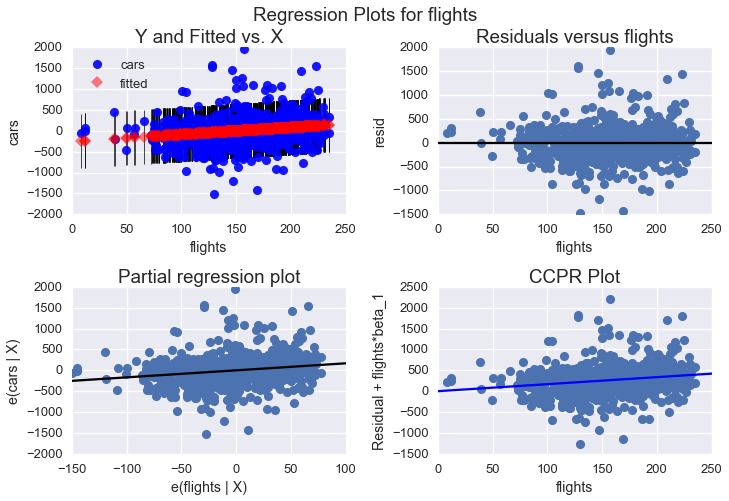

In [62]:
x1 = sap.graphics.plot_regress_exog(model, 1)

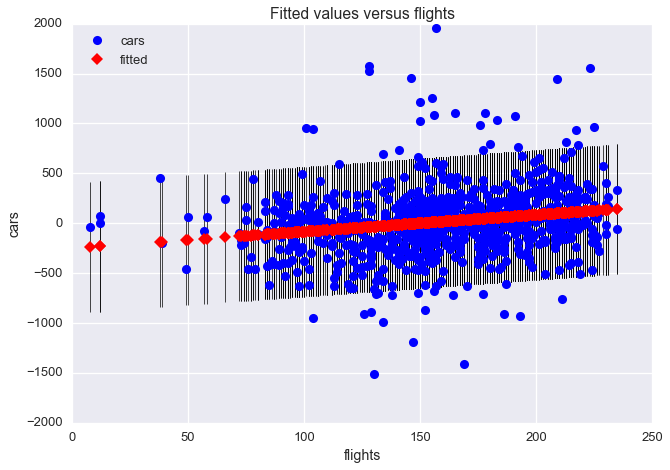

In [63]:
sap.graphics.plot_fit(model, "flights");

# Taking into account arriving vs. departing flights

In [64]:
arrivals = flights.loc[flights['Arriving or Departing Flag'] == 'Arriving']

In [65]:
departures = flights.loc[flights['Arriving or Departing Flag'] == 'Departing']

In [66]:
arrByDay=arrivals.groupby('Actual Date Time').count().drop('MAG Airport Name',1).drop('Scheduled Date', 1).drop('Operator IATA Code',1).drop('Operator Name', 1).drop('Arriving or Departing Flag',1).drop('Airport IATA Code',1).drop('Scheduled Date Time', 1).drop('# Pax',1).rename(index=str, columns={"Airport Name":"Count"})
depByDay=departures.groupby('Actual Date Time').count().drop('MAG Airport Name',1).drop('Scheduled Date', 1).drop('Operator IATA Code',1).drop('Operator Name', 1).drop('Arriving or Departing Flag',1).drop('Airport IATA Code',1).drop('Scheduled Date Time', 1).drop('# Pax',1).rename(index=str, columns={"Airport Name":"Count"})

In [67]:
arrAndP = arrByDay.merge(carsByDay, left_index=True, right_index=True, how='left')
arrAndP=arrAndP.rename(columns={"Count_x":"arrivals", "Count_y":"cars"})
depAndP = depByDay.merge(carsByDay, left_index=True, right_index=True, how='left')
depAndP=depAndP.rename(columns={"Count_x":"departures", "Count_y":"cars"})
allJoined = arrAndP.merge(depByDay, left_index=True, right_index=True, how='left')
allJoined=allJoined.rename(columns={"Count":"departures"})
allJoined=allJoined.ix[:-1];

In [68]:
allJoined.tail()

,arrivals,cars,departures
2015-03-27,84,64.0,88.0
2015-03-28,54,305.0,61.0
2015-03-29,47,490.0,52.0
2015-03-30,71,215.0,71.0
2015-03-31,87,985.0,89.0


In [69]:
random.seed(123)
train2, validation2 = train_test_split(allJoined, test_size=0.2)

In [70]:
model2 = sm.ols(formula = "cars ~ arrivals + departures", data = train2).fit()

In [71]:
predictions2 = model2.predict(validation2[['arrivals', 'departures']])

In [72]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cars   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     75.15
Date:                Fri, 30 Sep 2016   Prob (F-statistic):           7.72e-31
Time:                        14:36:55   Log-Likelihood:                -6283.2
No. Observations:                 876   AIC:                         1.257e+04
Df Residuals:                     873   BIC:                         1.259e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -183.0041     43.288     -4.228      0.000    -267.965     -98.043
arrivals     -24.3579      2.308    -10.553      0.000     -28.888     -19.828
departures    26.2579      2.240     11.720      0.000      21.861      30.655
==============================================================================
Omnibus:                      162.205   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.329
Skew:                           0.636   Prob(JB):                    9.82e-251
Kurtosis:                       8.470   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

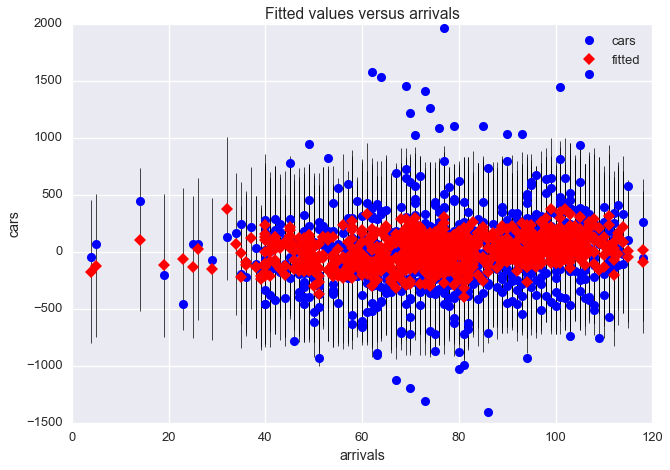

In [73]:
sap.graphics.plot_fit(model2, "arrivals");

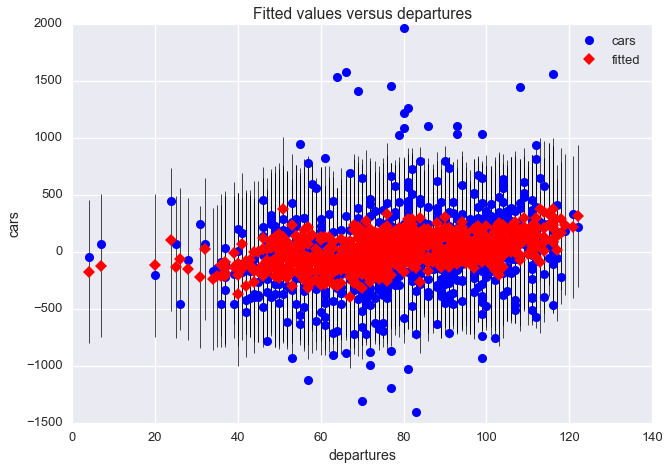

In [74]:
sap.graphics.plot_fit(model2, "departures");

# Comparing the two models

In [75]:
sap.stats.anova_lm(model,model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,874.0,9.559115e+07,0.0,NaN,NaN,NaN
1,873.0,8.711549e+07,1.0,8.475665e+06,84.936166,2.247890e-19


In [76]:
print("Number of flights model:",model.aic, "\n", "Arrivals and Departures model", model2.aic)

Number of flights model: 12651.7771744 
 Arrivals and Departures model 12572.44444


### The model that separates arrivals and departures has a better fit

# Taking only arrivals into account

In [78]:
random.seed(123)
arrAndP=arrAndP.ix[:-1];
traina, validationa = train_test_split(arrAndP, test_size=0.2)

In [79]:
modela = sm.ols(formula = "cars ~ arrivals", data = traina).fit()

In [80]:
predictionsa = modela.predict(validationa)

In [81]:
validationa.head()

,arrivals,cars
2012-07-20,102,283.0
2014-08-27,111,-577.0
2015-01-01,21,-121.0
2012-11-01,86,-128.0
2014-03-09,48,-186.0


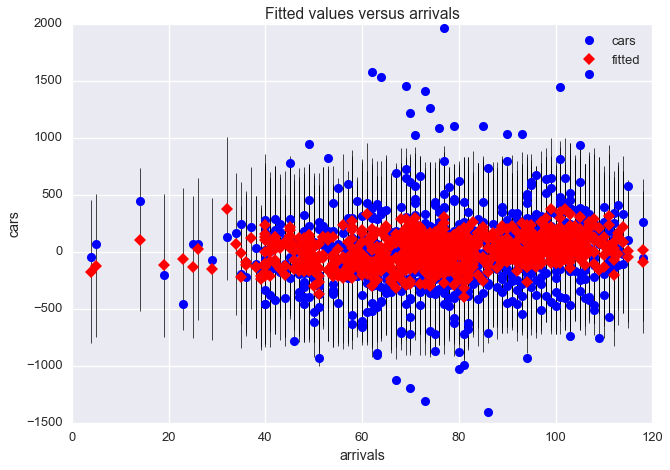

In [82]:
sap.graphics.plot_fit(model2, "arrivals");

In [83]:
print("Only arrivals model:",modela.aic, "\n", "Arrivals and Departures model", model2.aic)

Only arrivals model: 12663.1878722 
 Arrivals and Departures model 12572.44444


### The model that separates arrivals and departures still has a better fit than only taking arrivals into account

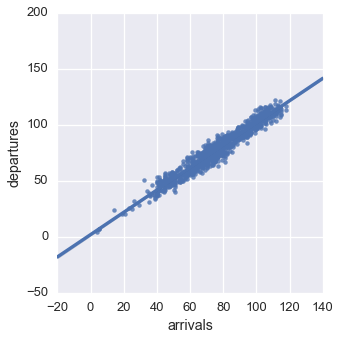

In [86]:
# fig, ax = plt.subplots()
ax.set_ylabel('Count')
ax.set_title('Arrivals and Departures')
sb.lmplot(x="arrivals", y="departures", data=allJoined)

# Comparing models based on the rmse of the validation predictions

In [91]:
print('rmse of the model with the total number of flights:',sap.tools.eval_measures.rmse(predictions, validation.cars))
print('rmse of the model with separated arrivals and departures:',sap.tools.eval_measures.rmse(predictions2, validation2.cars))
print('rmse of the model only with the arrivals:',sap.tools.eval_measures.rmse(predictionsa, validationa.cars))

rmse of the model with the total number of flights: 355.861002976
rmse of the model with separated arrivals and departures: 310.894891404
rmse of the model only with the arrivals: 356.871241962


### The best approach would be to separate arrivals and departures